Importa o modelo a ser fatiado e mapeado

In [1]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/TangranV2/input/stl_models/chavinha90.stl
Second arg: 300.0
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/input/sliced
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = -20.832, model zmax = 20, first plane Z = -22.828, number of planes = 23
-Incremental, chavinha90.stl, thickness = 2, #T = 312, #P = 21, #S = 1540, 0.000201s (slicing), 0.000759s (polygon assembling), 0.003785s (total), *K: 4.9359


/bin/bash: /home/matheus/anaconda3/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing image: ../input/sliced/layer_010.pgm


writing image: ../input/sliced/layer_011.pgm


writing image: ../input/sliced/layer_012.pgm


writing image: ../input/sliced/layer_013.pgm


writing image: ../input/sliced/layer_014.pgm


writing image: ../input/sliced/layer_015.pgm


writing image: ../input/sliced/layer_016.pgm


writing image: ../input/sliced/layer_017.pgm


writing image: ../input/sliced/layer_018.pgm


writing image: ../input/sliced/layer_019.pgm


writing image: ../input/sliced/layer_020.pgm


writing out

Paredes Finas

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
#[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
[d_ext, sob_ext_per] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        #c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        c.make_thin_walls(folders, d_ext, sob_ext_per)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 1.5636091232299805
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.001871347427368164
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.01910686492919922
Total de [Fase 1: Camada: 0] : 1.5933120250701904
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 1.5378799438476562
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0006082057952880859
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.012143611907958984
Total de [Fase 1: Camada: 1] : 1.5574562549591064
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 1.6017675399780273
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0022597312927246094
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.01875591278076172
Total de [Fase 1: Camada: 2] : 1.629

Contornos

In [3]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,external_max,internal_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 5
Total de [Criando Lvls] : 1.1230072975158691
Criando os loops
Total de [Criando os loops] : 0.37923240661621094
Criando regiões de influência
Total de [Criando regiões de influência] : 0.059148550033569336
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.7332074642181396
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:622 maior void:0.32852386237513875Bw -> aceito
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 1] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:72672 maior void:78.2597114317425Bw -> bloqueado
['Lvl_002', 0, 0] Perdendo total:11852 maior void:5.847946725860155Bw -> bloqueado
['Lvl_003', 0, 0] Perdendo total:11285 maior void:5.700332963374029Bw -> bloqueado
['Lvl_004', 0, 0] Perdendo total:5394 maior void:2.591564927857936Bw -> bloqueado
['Lvl_001', 0, 1] Perdendo total:15883 maior void:8.793562708102108Bw -> bloqueado


Pontes

In [1]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, d_int, sob_int_per] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(folders, n_max, d_int, sob_int_per, len(camadas), sum_prohibited_areas)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.7600562572479248
Criando pontes de Zigzag
Fechou uma ponte OK
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 4.350683689117432
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Elemento: ('Reg_000', 'Reg_002') Maior prioridade: 1
Total de [Criando pontes de Crossover] : 0.018296241760253906
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.010429143905639648
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 0.0005090236663818359
salvando imagens das regiões
deletado: /L_000/I_000/bridges
Total de [salvando imagens das regiões] : 0.13548731803894043
Total de [Fase 3: Camada: 0] : 5.319214344024658
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.9578607082366943
Criando pontes de Zigzag
Fechou uma ponte OK
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 3.9199793338775635
Criando pontes de C

Zigzags

In [2]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 3.363886833190918
salvando imagens das regiões
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das regiões] : 0.012954235076904297
Total de [Fase 4: Camada: 0] : 3.452136516571045
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 2.5570085048675537
salvando imagens das regiões
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das regiões] : 0.015751361846923828
Total de [Fase 4: Camada: 1] : 2.6385116577148438
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 4.875845909118652
salvando imagens das regiões
deletado: /L_002/I_000/zigzags
Total de [salvando imagens das regiões] : 0.013218402862548828
Total de [Fase 4: Camada: 2] : 4.965615749359131
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.2796387672424316
salvando imagens das regiões
deletado: /L_003

iMAGEM DO MAPEAMENTO

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.2444469928741455
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 1.4718525409698486
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.19789791107177734
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.22273039817810059
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.22246193885803223
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.23030495643615723
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.2294762134552002
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.2519383430480957
Fase 4: Camada: 8


Total de [Fase 4: Camada: 8] : 0.2215745449066162
Fase 4: Camada: 9


Total de [Fase 4: Camada: 9] : 0.23430299758911133


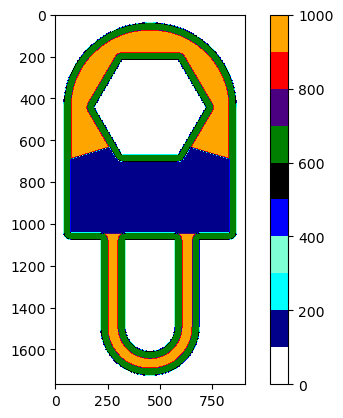

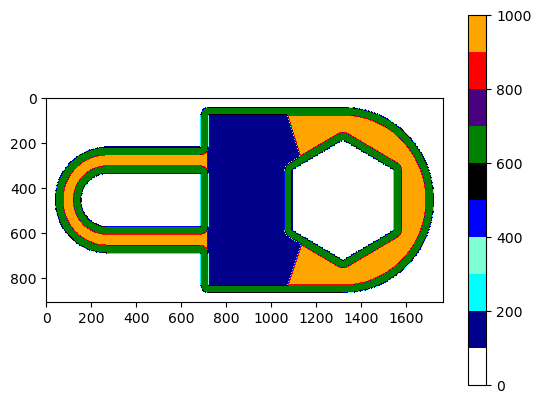

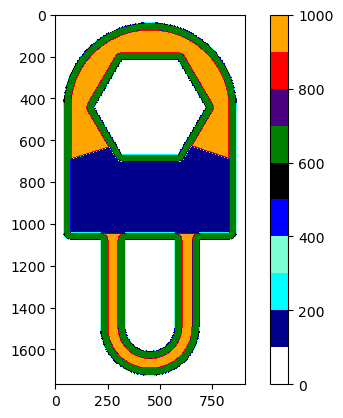

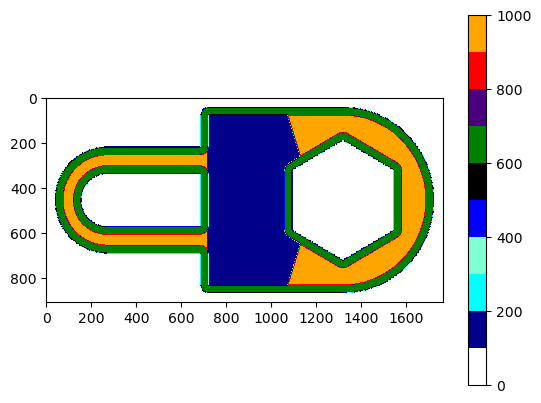

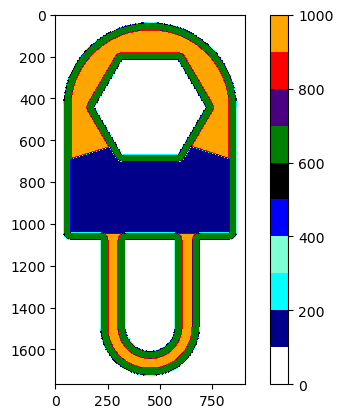

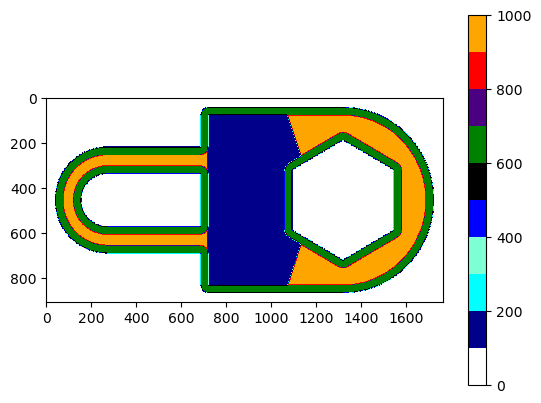

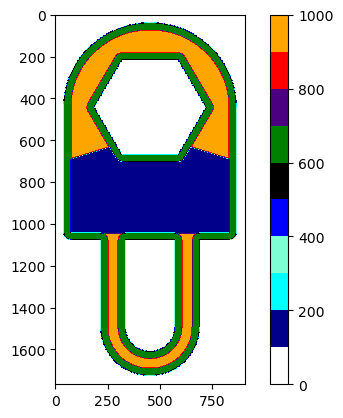

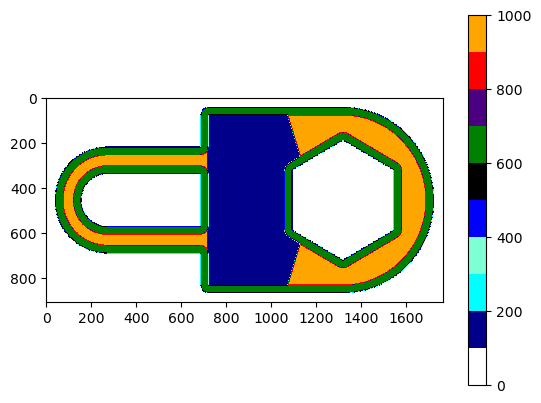

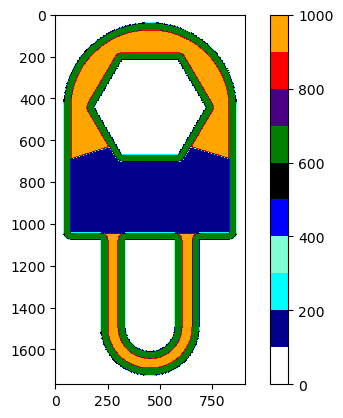

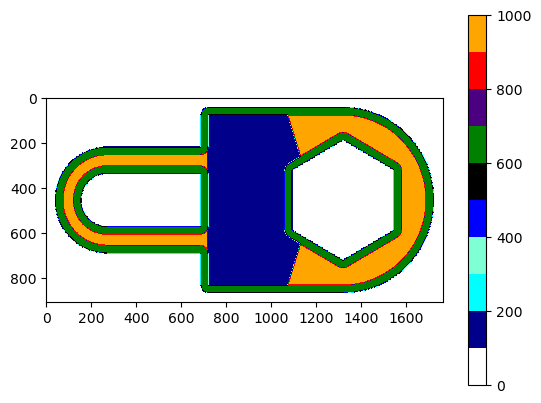

In [3]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [4]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05323481559753418
Total de [Making offset routes] : 1.2300705909729004
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05311107635498047
Total de [Making offset routes] : 1.2361640930175781
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05660080909729004
Total de [Making offset routes] : 1.2679286003112793
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0519258975982666
Total de [Making offset routes] : 1.1812710762023926
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05337190628051758
Total de [Making offset routes] : 1.309865951538086
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.052770376205444336
Total de [Making offset routes] : 1.1629915237426758
Making offset routes
salvando image

Rotas de pontes

In [5]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[sob_int_ext_per] = gui.ask_parameters_internal_routes()

with Timer(f"Making bridges routes"):
    for c in camadas:
        with Timer(f"Camada: {c.name}"):
            c.make_bridges_routes(folders, sob_int_ext_per)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
Camada: L_000
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00017261505126953125
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 3.2901763916015625e-05
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 7.565503835678101
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.07132554054260254
Total de [Camada: L_000] : 7.7983973026275635
Camada: L_001
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00015020370483398438
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 2.2649765014648438e-05
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 6.67946982383728
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.07779383659362793
Total de [Camada: L_001] : 6.893847942352295
Camada: L_002
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00019097328186035156
Making Zigza

Rotas de Ziguezague

In [6]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
fazendo as tres opções:
Total de [fazendo as tres opções:] : 4.67174220085144
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.09082388877868652
Total de [criando as rotas de zigzag, camada:L_000] : 4.992408037185669
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.027360916137695312
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0011031627655029297
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0005319118499755859
salvando grafos
Total de [salvando grafos] : 0.05536961555480957
Total de [Making zigzag routes] : 5.198715686798096
Making zigzag routes
criando as rotas de zigzag, camada:L_001
fazendo as tres opções:
Total de [fazendo as tres opções:] : 2.3899223804473877
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.07361626625061035
Total de [criando as rotas de zigzag, camada:L_001] : 2.6334030628

WEAVING

In [7]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Pegando as falhas internas
Total de [Pegando as falhas internas] : 0.18308305740356445
Achando os contatos
Total de [Achando os contatos] : 1.0056207180023193
criando os weavings
Total de [criando os weavings] : 0.6768238544464111
Total de [gerando preenchimentos oscilatórios] : 2.6046948432922363
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.06945657730102539
Total de [Fase 5 b] : 2.6744794845581055
Fase 5 b
gerando preenchimentos oscilatórios
Pegando as falhas internas
Total de [Pegando as falhas internas] : 0.1387465000152588
Achando os contatos
Total de [Achando os contatos] : 0.31385326385498047
criando os weavings
Total de [criando os weavings] : 0.3060746192932129
Total de [gerando preenchimentos oscilatórios] : 1.4893498420715332
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.06625604629516602
Total de [Fase 5 b] : 1.5558602809906006
Fase 5 b
gerando p

Rotas de Thin Walls

In [8]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.026052474975585938
salvando imagens das rotas
Total de [salvando imagens das rotas] : 4.5299530029296875e-06
Total de [Making thin walls routes] : 0.02625560760498047
Total de [Fase 5] : 0.02634263038635254
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.021556377410888672
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.86102294921875e-06
Total de [Making thin walls routes] : 0.021697282791137695
Total de [Fase 5] : 0.021704912185668945
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.0239565372467041
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.86102294921875e-06
Total de [Making thin walls routes] : 0.024101972579956055
Total de [Fase 5] : 0.0241091251373291
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.019675493240356445
salvando imagens das rotas
Total de [sal

Encontrando o lugar onde será o começo da trilha de cada ilha

In [9]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.islands_path_starts(folders)

%reset_selective -f "camadas"                        

Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0009064674377441406
Total de [Encontrando ponto de união ext-int] : 0.1412968635559082
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0010573863983154297
Total de [Encontrando ponto de união ext-int] : 0.11598634719848633
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0009236335754394531
Total de [Encontrando ponto de união ext-int] : 0.142075777053833
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0012073516845703125
Total de [Encontrando ponto de união ext-int] : 0.12156176567077637
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0010066032409667969
Total de [Encontrando ponto de união ext-int] : 0.13960480690002441
Encontrando ponto de união ext-int
salvando

Unificando rotas EXTERNAS nas camadas

In [10]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.11695051193237305
Conectando pontes de Crossover
salto:  [611, 642]
salto:  [1072, 321]
Total de [Conectando pontes de Crossover] : 0.8600809574127197
Total de [Conectando rotas externas] : 1.1991775035858154
salvando imagens das rotas
deletado: /L_000/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.07841038703918457
Total de [Fase 6] : 1.2779099941253662
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.11649298667907715
Conectando pontes de Crossover
salto:  [321, 694]
salto:  [645, 1161]
Total de [Conectando pontes de Crossover] : 2.172588586807251
Total de [Conectando rotas externas] : 2.4982337951660156
salvando imagens das rotas
deletado: /L_001/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.07578468322753906
Total de [Fase 6] : 2.574209690093994
Fase 6
Conectando rotas externas
Conec

Unificando rotas INTERNAS nas camadas

In [11]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 1.1101384162902832
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0018620491027832031
salvando imagens das rotas
deletado: /L_000/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.06212949752807617
Total de [Fase 7] : 1.3956637382507324
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.8114535808563232
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0015609264373779297
salvando imagens das rotas
deletado: /L_001/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.06713485717773438
Total de [Fase 7] : 1.0883033275604248
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 1.0050842761993408
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0015416145324707031
salvando imagens das rotas
deletado: /L_002/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 

Unindo rotas de thin walls

In [12]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0024590492248535156
salvando imagens das rotas
deletado: /L_000/I_000/thinwalls_tree_route/sequence
deletado: /L_000/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.05569314956665039
Total de [Fase 8] : 0.08299899101257324
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0010204315185546875
salvando imagens das rotas
deletado: /L_001/I_000/thinwalls_tree_route/sequence
deletado: /L_001/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.05208015441894531
Total de [Fase 8] : 0.0745997428894043
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0009329319000244141
salvando imagens das rotas
deletado: /L_002/I_000/thinwalls_tree_route/sequence
deletado: /L_002/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.052367448806762695
Total de [Fase 8] : 0.07690262794494629
Fase 8
Convertendo parede

Unindo todas as rotas

In [13]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.016819477081298828
Conectando todas as partes
Total de [Conectando todas as partes] : 0.010169029235839844
salvando imagens das rotas
deletado: /L_000/I_000/island_route
[[1041, 849], [445, 849], [444, 848], [427, 848], [426, 847], [392, 846], [391, 845], [386, 845], [385, 844], [381, 844], [380, 843], [376, 843], [375, 842], [371, 842], [370, 841], [366, 841], [365, 840], [360, 840], [359, 839], [345, 837], [344, 836], [336, 834], [333, 832], [325, 830], [323, 828], [317, 827], [316, 826], [311, 825], [308, 823], [300, 821], [248, 795], [227, 781], [224, 778], [211, 770], [200, 760], [199, 760], [165, 728], [165, 727], [159, 721], [159, 720], [153, 714], [153, 713], [147, 707], [147, 706], [141, 700], [141, 699], [134, 691], [124, 676], [123, 673], [109, 653], [97, 629], [97, 627], [86, 606], [86, 604], [85, 603], [85, 601], [84, 600], [84, 598], [83, 597], [83, 595], [82, 594], [82, 592], [81, 591], 

Gerando o Código G

In [14]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_int, vel_ext, vel_thin_wall, vel_vazio, p_religamento, p_desligamento, p_entre_int_ext, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [41+8+2+(i*1.5) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               vel_int,
                               vel_ext, 
                               vel_vazio,
                               vel_thin_wall, 
                               p_religamento,
                               p_desligamento,
                               p_entre_int_ext,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
nome: L_000/I_000
[[1041, 849], [445, 849], [444, 848], [427, 848], [426, 847], [392, 846], [391, 845], [386, 845], [385, 844], [381, 844], [380, 843], [376, 843], [375, 842], [371, 842], [370, 841], [366, 841], [365, 840], [360, 840], [359, 839], [345, 837], [344, 836], [336, 834], [333, 832], [325, 830], [323, 828], [317, 827], [316, 826], [311, 825], [308, 823], [300, 821], [248, 795], [227, 781], [224, 778], [211, 770], [200, 760], [199, 760], [165, 728], [165, 727], [159, 721], [159, 720], [153, 714], [153, 713], [147, 707], [147, 706], [141, 700], [141, 699], [134, 691], [124, 676], [123, 673], [109, 653], [97, 629], [97, 627], [86, 606], [86, 604], [85, 603], [85, 601], [84, 600], [84, 598], [83, 597], [83, 595], [82, 594], [82, 592], [81, 591], [81, 589], [80, 588], [80, 586], [79, 585], [79, 583], [78, 582], [78, 580], [70, 558], [70, 555], [69, 554], [69, 550], [68, 549], [68, 545], [67, 544], [67, 539], [66, 538], [66, 534], [65, 533], [65, 529], [64, 528], 

In [15]:
# import numpy as np
# camadas = folders.load_layers_hdf5()
# for c in camadas:
#     folders.load_islands_hdf5(c)
#     for isl in c.islands:
#         folders.load_island_paths_hdf5(c.name, isl)
#         internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
#         print(internal_trees)
# print([235,807] in internal_trees)

In [16]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [17]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [18]:
# class TrafficLightState:
#     """Base class for traffic light states."""
#     def change(self, traffic_light):
#         raise NotImplementedError("This method should be overridden by subclasses")


# class RedState(TrafficLightState):
#     """State representing the red light."""
#     def change(self, traffic_light):
#         print("Changing from Red to Green")
#         traffic_light.state = GreenState()


# class YellowState(TrafficLightState):
#     """State representing the yellow light."""
#     def change(self, traffic_light):
#         print("Changing from Yellow to Red")
#         traffic_light.state = RedState()


# class GreenState(TrafficLightState):
#     """State representing the green light."""
#     def change(self, traffic_light):
#         print("Changing from Green to Yellow")
#         traffic_light.state = YellowState()


# class TrafficLight:
#     """Traffic light class that uses a state machine."""
#     def __init__(self):
#         self.state = RedState()  # Initial state

#     def change(self):
#         """Change the state of the traffic light."""
#         self.state.change(self)

#     def __str__(self):
#         return f"Current state: {self.state.__class__.__name__}"


# # Example usage
# if __name__ == "__main__":
#     traffic_light = TrafficLight()
    
#     # Simulate the traffic light changing states
#     for _ in range(6):  # Change state 6 times
#         print(traffic_light)
#         traffic_light.change()

In [19]:
# import numpy as np
# import cv2  # Assuming you are using OpenCV for image processing

# def bobobo(image1, image2):
#     """A placeholder function that performs some operation on two images."""
#     # For demonstration, let's just return the absolute difference between the two images
#     return cv2.absdiff(image1, image2)

# def process_images(image_list):
#     """Process a list of images, comparing the last two with the current image."""
#     for i in range(len(image_list)):
#         current_image = image_list[i]
        
#         # Check if there are at least two previous images to compare
#         if i >= 2:
#             last_image = image_list[i - 1]
#             second_last_image = image_list[i - 2]
            
#             # Apply the bobobo function to the current image and the last two images
#             result_last = bobobo(current_image, last_image)
#             result_second_last = bobobo(current_image, second_last_image)
            
#             # Here you can do something with the results, like saving or displaying them
#             # For demonstration, we'll just print the shapes of the results
#             print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
#             print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# # Example usage
# if __name__ == "__main__":
#     # Create a list of dummy images (for demonstration purposes)
#     # In practice, you would load your images using cv2.imread or similar
#     image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
#     process_images(image_list)